# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
from scipy import stats
import scipy.stats as stats
df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Your work here.

# 1. Is the distribution of body temperatures normal?
## We use the 3 methods below and determined it's normal distribution.

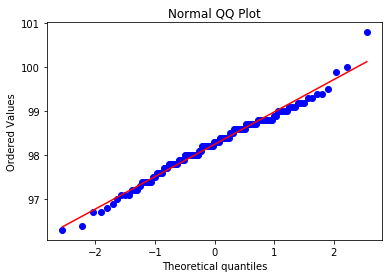

In [5]:
# Method 1: qq plot
temp = df.temperature
stats.probplot(temp, dist='norm', plot=pylab)
pylab.title('Normal QQ Plot')
pylab.show()

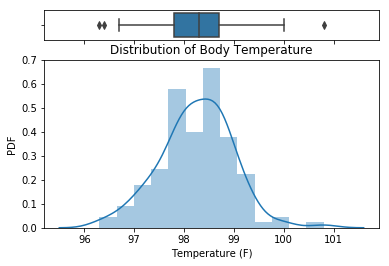

In [6]:
# Method 2: using a boxplot and seaborn to plot the dataset, obeserving that it's normal distribution.
## Create a diagram with 2 plots: a boxplot & a histogram. 
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(temp, ax=boxplot)
sns.distplot(temp, ax=histogram)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of Body Temperature')

## Remove xlabel for the boxplot. Otherwise the title would overlap with xlabel of boxplot.
_ = boxplot.set(xlabel='')

In [7]:
# Method 3: use cumulative distribution diagram and observed it's normal distribution.
mean = np.mean(temp)
std = np.std(temp)
# Simulate a random sample (an array) with a sample size of 10000.
samples = np.random.normal(mean, std, size=10000)
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y
x, y = ecdf(temp)
x_theor, y_theor = ecdf(samples)

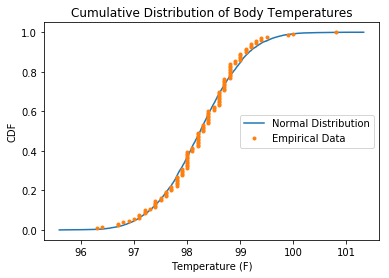

In [8]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Cumulative Distribution of Body Temperatures')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')

# 2. Is the sample size large? Are the observations independent?
The sample size is 130, which is larger than what is required to be large in Central Limit Theorem, 30. The observations are considered independent as each individual's body temperature are independent of each other.

In [9]:
len(temp)

130

# 3. Is the true population mean really 98.6 degrees F?
## Would you use a one-sample or two-sample test? Why? 
## In this situation, is it appropriate to use the  𝑡 or  𝑧 statistic? Now try using the other test. How is the result be different? Why?
$H_0$ Null Hypothesis: the true population mean is 98.6 degrees F.
<br>$H_A$ Alternative Hypothesis: the true population mean is not 98.6 degrees F.
<br>Significance level: 95% Confidence.

-  It's best to use one-sample test for Frequentist statistical testing, as we are testing a single value. We'll use t-statistic. Even thought the sample size > 30, we only know the sample standard deviation, but not the population standard devidation.

-  Results below show that p-value < significance level of 0.01. Therefore, we can reject the null hypothesis.

-  When we use z-test, the z-statistic is very close to t-statistic. Its p-value is also very low.

In [10]:
# 1) Bootstrap hypothesis test
size = 100000
bs_replicates = np.empty(size)
data = np.random.choice(temp, len(temp))
for i in range(100000):
    bs_replicates[i] = np.mean(data)
    
# Calculate fraction of replicates that are equal to 98.6
p = np.sum(bs_replicates == 98.6) / size
p

0.0

As the p-value for the bootstrap hypothesis test is 0.0, we reject the null hypothesis.

In [11]:
# see the results of a one-sample test.
print('Sample mean:', mean)
print('Sample standard deviation:', std)
sem = std/np.sqrt(129)
print('Standard error of mean:', sem)

Sample mean: 98.24923076923078
Sample standard deviation: 0.7303577789050377
Standard error of mean: 0.06430441683789101


In [12]:
lower = mean - 1.96*sem
upper = mean + 1.96*sem
print('Confidence interval of 95%:', lower,'-', upper)

Confidence interval of 95%: 98.12319411222852 - 98.37526742623304


As 98.6 doesn't lie within the confidence level, we reject the null hypothesis.

In [13]:
# Use of t-test
from scipy.stats import ttest_1samp
t, p_t = ttest_1samp(temp, popmean=98.6)
print('t statistics:', t)
print('p-value:',p_t)

t statistics: -5.4548232923645195
p-value: 2.4106320415561276e-07


Since the p-value of the t-test is smaller than 0.01, we can reject the null hypothesis.

In [14]:
# Use a different method of z-test.
z = (mean - 98.6)/sem
p_z = stats.norm.cdf(z) * 2
print('z-statistics:', z)
print('p-value:', p_z)

z-statistics: -5.454823292364079
p-value: 4.90215701411338e-08


Since the p-value of the z-test distribution is extremely smaller than 0.01, we can reject the null hypothesis.
In each of the test above, the p-value < 0.01. Therefore, the null hypothesis is rejected.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
-  Which one is the correct one to use?
-  What do you notice? What does this tell you about the difference in application of the  𝑡
t
  and  𝑧
z
  statistic?

In [15]:
# 4. Draw a sample of size 10
sample = np.random.choice(temp, size=10)
sample

array([98.8, 98. , 98.8, 97.7, 99.3, 99. , 96.4, 98.8, 99.3, 96.8])

In [16]:
# Results of one-sample t-test.
tt,p_tt = ttest_1samp(sample, popmean=98.6)

# Results of one-sample z-test
from statsmodels.stats.weightstats import ztest
zz,p_zz = ztest(sample, value=98.6)

print('p-value of t-test:', p_tt)
print('p-value of z-test:', p_zz)

p-value of t-test: 0.3661023389900475
p-value of z-test: 0.34124477763445293


The correct test to use for a smaller sample size of 10 should be t-test. z-test is better for a sample size larger than 30.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
-  As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
-  Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [17]:
# Use boostrap approach by using a 95% confidence interval
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature,size))
bs_ci = np.percentile(bs_replicates,[2.5,97,5])
print('95% confidence interval:',bs_ci[0],'-', bs_ci[1])

95% confidence interval: 98.2447709 - 98.25363626999997


In [18]:
# Use Frequentist approach by using a 95% confidence leval
moe = 1.96*std
lower_bd = mean - moe
upper_bd = mean + moe
print('Margin of error:', moe)
print('95% confidence level:', lower_bd, '-', upper_bd)

Margin of error: 1.431501246653874
95% confidence level: 96.8177295225769 - 99.68073201588466


Temperature is considered abnormal when it falls outside of the interval (96.82, 99.68).

## 6. Is there a significant difference between males and females in normal temperature?
-  What testing approach did you use and why?
-  Write a story with your conclusion in the context of the original problem.

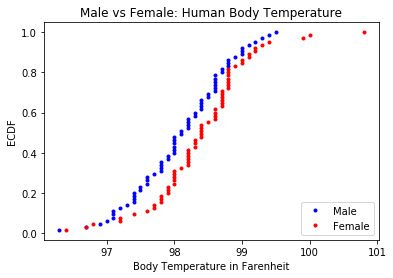

The difference between male and female body temperature: -0.289230769230727


In [26]:
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature

# Plotting ECDF
x_male, y_male = ecdf(male)
x_female, y_female = ecdf(female)
plt.plot(x_male, y_male, marker='.', linestyle='none', color='blue')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='red')
plt.xlabel('Body Temperature in Farenheit')
plt.ylabel('ECDF')
plt.legend(('Male','Female'), loc='lower right')
plt.title('Male vs Female: Human Body Temperature')
plt.show()

diff = np.mean(male) - np.mean(female)
print('The difference between male and female body temperature:', diff)

In [29]:
# Use 2-sample test since we are testing 2 values.
from scipy.stats import ttest_ind
t_2, p_2 = ttest_ind(male, female)
print('p-value for the 2-sample t-test:',p_2)

p-value for the 2-sample t-test: 0.02393188312239561


$H_0$: There's no difference between male and female body temperature.
<br>$H_A$: There's difference between male and femal body temperature.
<br>Since the p-value is sufficiently smale, < 0.05, we reject the null hypothesis.